#Social network visualization and analysis

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

## Network
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

The first step is the calculation and layout of the network from the relationship database.

The second step is the mathematical analysis of the network (calculation of centralities), to identify different roles of individuals in the network:

Who are the people who most influence the network? \
Who are the people who influence the transfer of information? \
Which are the best performers in information transfer?

In [51]:
#- Import data 
df = pd.read_csv('/content/member-edges.csv')
print(len(df))

1176368


##Network visualization

The data is very large, For this noteboook we will limit the computing time a bit by reducing the size of the data.

In [52]:
df = df[0 : 1000]

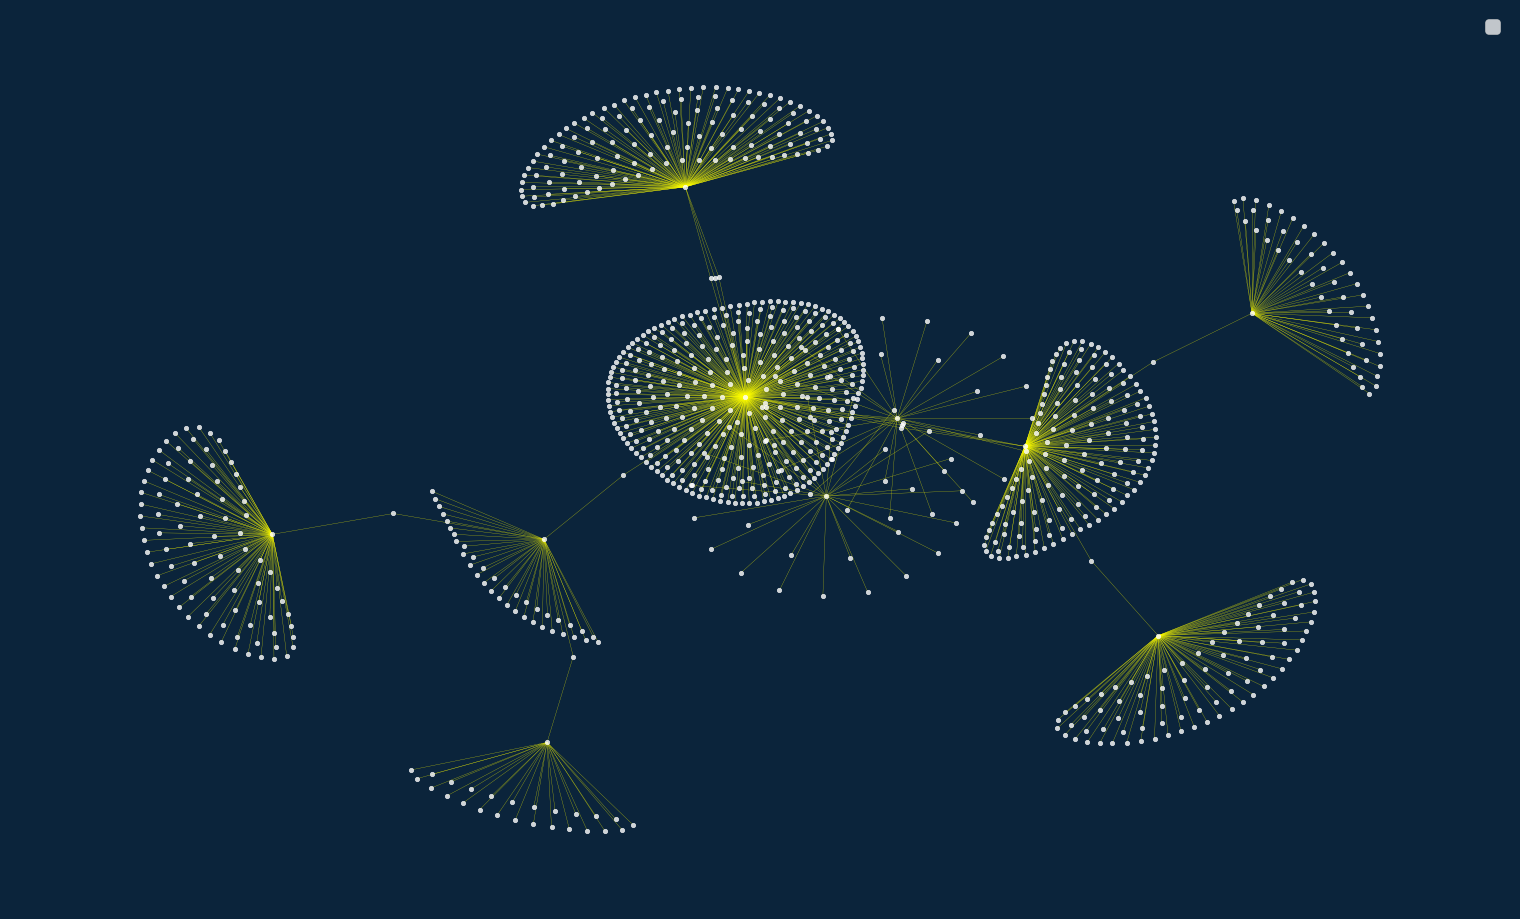

In [53]:
########################## Network drawing #################################
pd.set_option('precision',10)
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,
        pos,
        alpha = 0.8, 
        nodelist = nodes, 
        node_color = 'w', 
        node_size = 10, 
        with_labels= False,
        font_size = 6, 
        width = 0.2, 
        cmap = cmap, 
        edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

##Network analysis

**Complex graph theory and network analysis**

To assign roles and make categories between individuals we will calculate mathematical indicators from the theory of complex graphs:

- The centrality of proximity: This indicator makes it possible to detect the individuals who have a significant power on the transfer of information. Individuals with a large centralized proximity have the ability to contact a very large number of individuals easily
- The betweeness centrality: This indicator can detect individuals who influence the transfer of information. If these individuals do not exist in the network, then the information can not flow on both sides of the network.
- The eigenvector centrality: The individuals having a high spectral centralized are the individuals who have the most relation in the network, they are central and have influence in a general way on the network.

In [54]:
################ Analyse ###############

# Calculation of the different coefficients of centrality and storage in a dataframe of independent nodes

# We will create an output dataframe with the nodes and their attributes to store the results of the analysis

# Degree of each node
for i in sorted(G.nodes()):
    G.nodes[i]['Degree'] = G.degree(i)


#extraction of network nodes in a dataframe
nodes_data = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
nodes_data = nodes_data.sort_index(ascending= False)
nodes_data.index.names=['ID']
nodes_data.reset_index(level=0, inplace=True)
nodes_data = nodes_data.sort_values(by='Degree', ascending=False).reset_index(drop=True)


# Betweenness centrality 
bet_cen = nx.betweenness_centrality(G)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen.columns = ['betweenness_centrality']
df_bet_cen.index.names = ['ID']
df_bet_cen.reset_index(level=0, inplace=True)
analyse= pd.merge(nodes_data,df_bet_cen, on = ['ID'])

# Clustering coefficient 
clust_coefficients = nx.clustering(G)
df_clust = pd.DataFrame.from_dict(clust_coefficients, orient='index')
df_clust.columns = ['clust_coefficient']
df_clust.index.names = ['ID']
df_clust.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clust, on = ['ID'])

# Closeness centrality 
clo_cen = nx.closeness_centrality(G)
df_clo = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo.columns = ['closeness_centrality']
df_clo.index.names = ['ID']
df_clo.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clo, on = ['ID'])

# Eigenvector centrality
#eig_cen = nx.eigenvector_centrality(G)
#eig_cen = nx.katz_centrality(G)
eig_cen = nx.eigenvector_centrality_numpy(G)
df_eig = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig.columns = ['eigenvector_centrality']
df_eig.index.names = ['ID']
df_eig.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_eig, on = ['ID'])


print(analyse)

            ID  Degree  betweenness_centrality  clust_coefficient  \
0    234684445     359            0.7569401592                  0   
1    226754592     154            0.4537892234                  0   
2    216072216     137            0.2350066231                  0   
3     73498632      88            0.1566864923                  0   
4    183566364      88            0.1566864923                  0   
..         ...     ...                     ...                ...   
994  204237509       1            0.0000000000                  0   
995  204211075       1            0.0000000000                  0   
996  204115611       1            0.0000000000                  0   
997  203857825       1            0.0000000000                  0   
998     509953       1            0.0000000000                  0   

     closeness_centrality  eigenvector_centrality  
0            0.3401347451            0.7069631803  
1            0.2674028213            0.0103417366  
2            0.